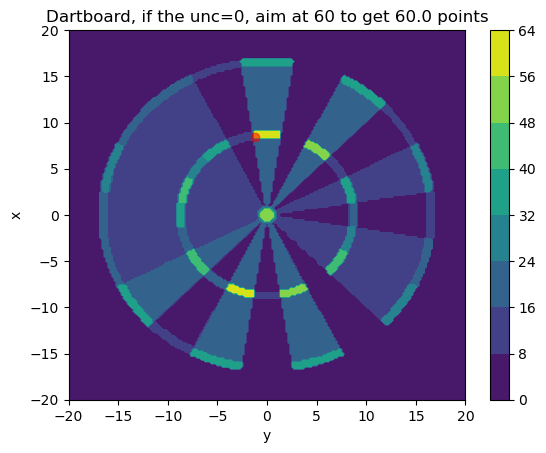

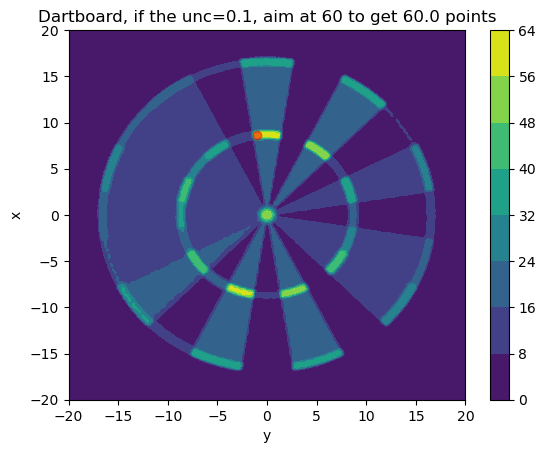

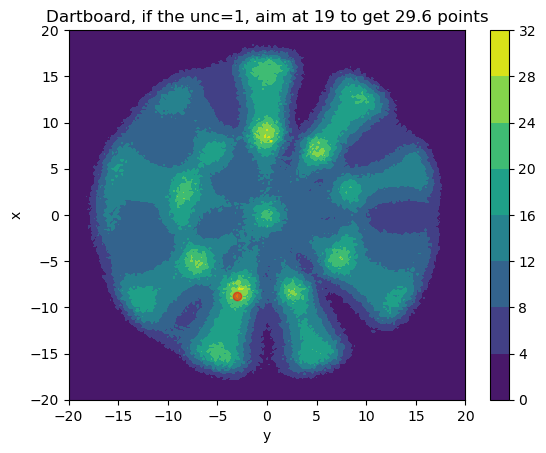

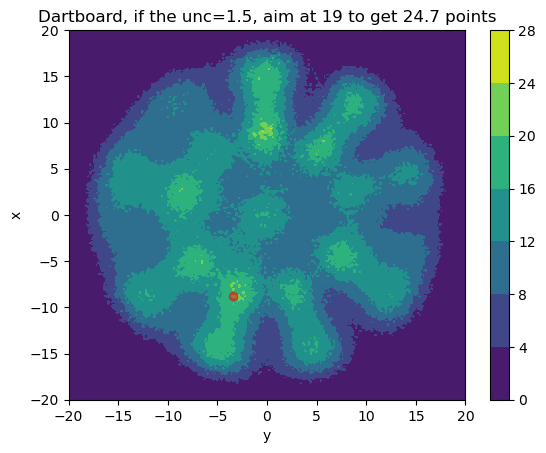

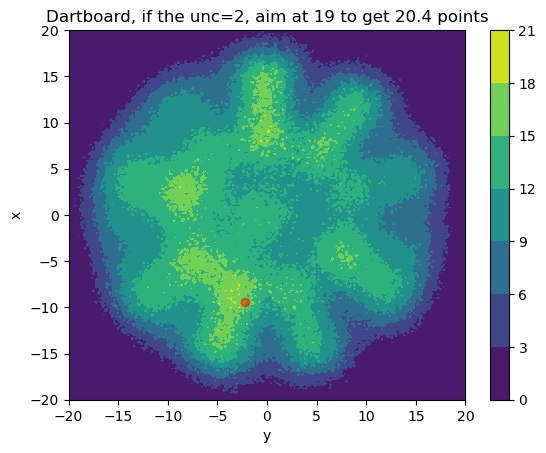

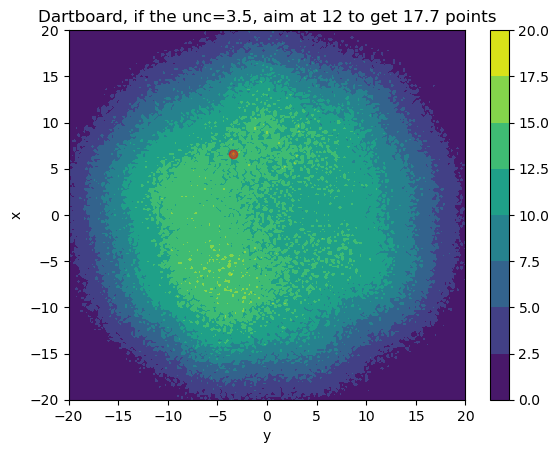

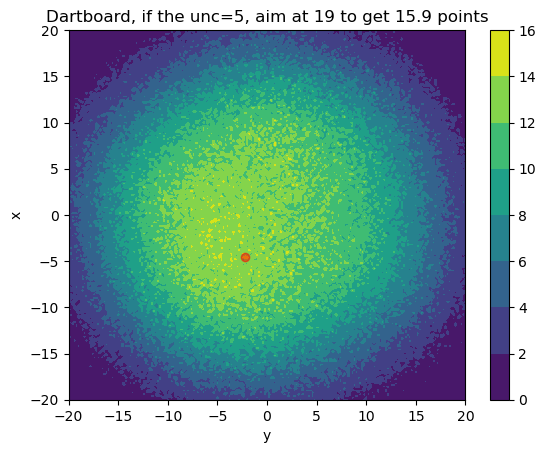

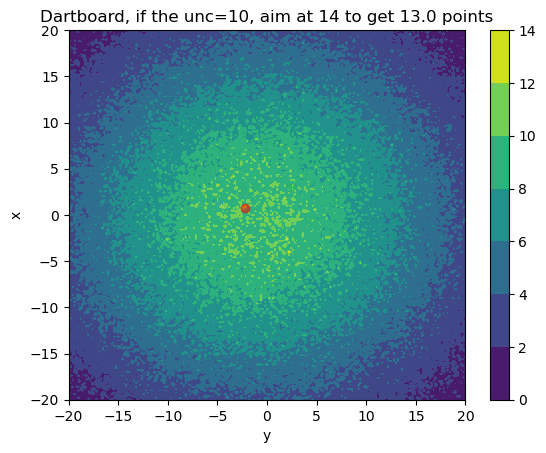

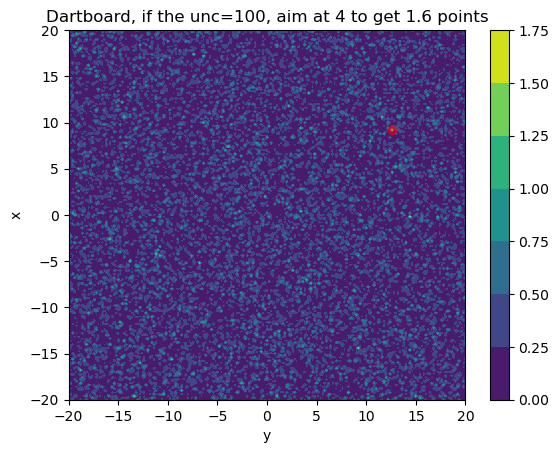

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def rboard(r):
    '''
    Function that finds if the dart has hit the double/triple ring, or is outside the board.

    inputs:
    r (float): distance from the center of the board

    outputs:
    times (int): multiplication factor
    '''
    if r < 8.3:
        times = 1
    elif r < 9.1:
        times = 3
    elif r < 16.2:
        times = 1
    elif r < 17:
        times = 2
    else:
        times = 0 
    return times

def thetaboard(theta_rad):
    '''
    Function that finds the value of the dart hit based on the angle.

    inputs:
    theta_rad (float): angle in radians

    outputs:
    val (int): value of the dart hit
    '''
    theta_deg = theta_rad*180/np.pi
    th = int((theta_deg+9)//18)
    val = [20, 1, 18, 4, 13, 6, 10, 15, 2, 17, 3, 19, 7, 16, 8, 11, 14, 9, 12, 5][th]
    return val

def board(x, y):
    '''  
    Function that calculates the score based on the dart's position.

    inputs:
    x (float): x-coordinate of the dart, in cm, with (0, 0) being bullseye
    y (float): y-coordinate of the dart, in cm, with (0, 0) being bullseye

    outputs:
    points (int): score based on the dart's position
    '''
    
    r = np.sqrt(x**2 + y**2)  
    times = 0 
    if r < 0.635:       #bullseye
        points = 50
    elif r < 0.965:     #outer bull
        points = 25
    else:               #calculating the angle and value
        if x > 0:
            theta = np.arctan(y/x)
        elif x < 0:
            theta = np.arctan(y/x) + np.sign(y)*np.pi
        
        elif x == 0:
            theta = np.sign(y)*np.pi/2
        
        val = thetaboard(theta)
        if x < 0 and y == 0: #special case
            val = 3
        times = rboard(r)
        points = times*val
    
    return points

def main(x_cen, y_cen, unc, nrtimes):
    '''
    Function that simulates throwing darts at a dartboard.
    
    inputs:
    x_cen (float): x-coordinate of the dartboard center, in cm
    y_cen (float): y-coordinate of the dartboard center, in cm
    unc (float): uncertainty in the dart's position, as a percentage of the distance from the center
    nrtimes (int): number of darts thrown

    outputs:
    val (float): average score from the darts thrown
    '''

    val = 0
    for i in range(nrtimes):
        x = np.random.normal(x_cen, unc) 
        y = np.random.normal(y_cen, unc)
        val += board(x, y)/nrtimes

    return val

def find_max_value_and_location(matrix):
    '''
    Function that finds the best xy location to aim at based on the dartboard scores.
    
    inputs:
    matrix (list of lists): 2D matrix containing values

    outputs:
    max_value (float): maximum value found in the matrix
    max_location (tuple): coordinates (i, j) of the maximum value in the matrix
    '''
    max_value = float('-inf')
    max_location = (-1, -1)
        
    for i, row in enumerate(matrix):
        for j, value in enumerate(row):
            if value > max_value:
                max_value = value
                max_location = (i, j)
        
    return max_value, max_location

def mainer(unc, verbose=False):
    '''
    Main function that sets up the dartboard simulation and finds the best aim point.

    inputs:
    unc (float): uncertainty in the dart's position, as a percentage of the distance from the center

    outputs:    
    x (np.array): x-coordinates for the dartboard
    y (np.array): y-coordinates for the dartboard
    mat (list of lists): 2D matrix containing scores for each dart position
    max_location (tuple): coordinates (i, j) of the maximum score in the matrix
    max_value (float): maximum score found in the matrix
    '''
    x = np.linspace(-20, 20, 201)
    y = np.linspace(-20, 20, 201)

    nrtimes = 100
    mat = []
    for i in x:
        if not i % 5 and verbose:
            print('At x='+str(i))
        mat.append([main(i, j, unc, nrtimes) for j in y])

    max_value, max_location = find_max_value_and_location(mat)

    return x, y, mat, max_location, max_value

for unc in [0, 0.1, 1, 1.5, 2, 3.5, 5, 10, 100]:
    fig, ax = plt.subplots()
    x, y, mat, max_location, max_value = mainer(unc)
    surf = ax.contourf(x, y, mat)
    plt.colorbar(surf)
    plt.scatter(float(y[max_location[1]]), float(x[max_location[0]]), c='r', alpha=0.5)
    plt.xlabel('y')
    plt.ylabel('x')
    plt.title(f'Dartboard, if the unc={unc}cm, aim at {board(x[max_location[0]], y[max_location[1]])} to get {max_value:.1f} points')
    plt.show()